Microcredit is a common form of microfinance that involves an extremely small loan given to an individual to help them become self-employed or grow a small business. These borrowers tend to be low-income individuals, especially from less developed countries (LDCs). Microcredit is also known as "microlending" or "microloan." We are working with one such client that is in Telecom Industry.They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers.Since Target is known,so it is a supervised learning problem and target has categorical values (0 and 1),So it is a classification problem.

In [1]:
## Importing necessary libraries:-
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Loading the file
df = pd.read_csv("/Users/pratiksingh/Downloads/Micro Credit Project/data_file.csv")
pd.set_option('display.max_columns',None)
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [3]:
# Lets have some basic insights about the data.
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [4]:
# Lets fnd how many number of columns we have.
len(df.columns)

37

In [5]:
## Checking size of the data set
df.shape

(209593, 37)

In [6]:
## Checking data types
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [7]:
##Checking unique values in each column:-
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

In [8]:
# Knowing more about the data by analysing the Statistical info.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,209593.0,104797.000000,60504.431823,1.000000,52399.000,104797.000000,157195.00,209593.000000
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755168
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377733
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809410
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000


In [9]:
# Checking target variable.
df.label.value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [10]:
# percentage of Defaulters and non-defaulters in column:label
df['label'].value_counts(normalize=True) * 100

1    87.517713
0    12.482287
Name: label, dtype: float64

Defaulters - 12.48%
Non-Defaulters - 87.51%
The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records. we can use various techniques to treat imbalanced classes such as- Random under-sampling
Random over-sampling
NearMiss

In [11]:
# We have 2 categorical variables to deal with before proceeding to visualization.
# pcircle is the telecom circle.
df.pcircle.value_counts()

UPW    209593
Name: pcircle, dtype: int64

In [12]:
# I have mentioned mobile number is irrelevant, but lets see if there is any duplicate mobile nos.
len(pd.unique(df["msisdn"]))

186243

# EDA

In [13]:
# Checking null values
df.isnull().sum()
# There are no null values in the dataset.

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

DATA VISUALIZATION

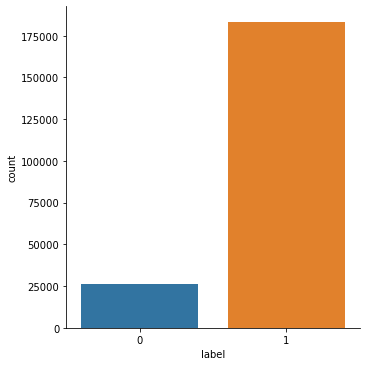

In [14]:
# Plotting target variable.
sns.catplot(x='label', data=df, kind='count')
plt.show()

In [15]:
# Added the columns which we require for visualizing to variable data_cols.
data_cols=["label","sumamnt_ma_rech90","daily_decr90","sumamnt_ma_rech30","daily_decr30","rental90","medianamnt_ma_rech30","last_rech_amt_ma","medianamnt_ma_rech90","rental30","medianmarechprebal30","aon","medianmarechprebal90","amnt_loans90","cnt_da_rech30","amnt_loans30","cnt_ma_rech90","cnt_ma_rech30","last_rech_date_ma","fr_ma_rech30","fr_ma_rech90"]
# Indexing the columns in variable data_cols
list(enumerate(data_cols))

[(0, 'label'),
 (1, 'sumamnt_ma_rech90'),
 (2, 'daily_decr90'),
 (3, 'sumamnt_ma_rech30'),
 (4, 'daily_decr30'),
 (5, 'rental90'),
 (6, 'medianamnt_ma_rech30'),
 (7, 'last_rech_amt_ma'),
 (8, 'medianamnt_ma_rech90'),
 (9, 'rental30'),
 (10, 'medianmarechprebal30'),
 (11, 'aon'),
 (12, 'medianmarechprebal90'),
 (13, 'amnt_loans90'),
 (14, 'cnt_da_rech30'),
 (15, 'amnt_loans30'),
 (16, 'cnt_ma_rech90'),
 (17, 'cnt_ma_rech30'),
 (18, 'last_rech_date_ma'),
 (19, 'fr_ma_rech30'),
 (20, 'fr_ma_rech90')]

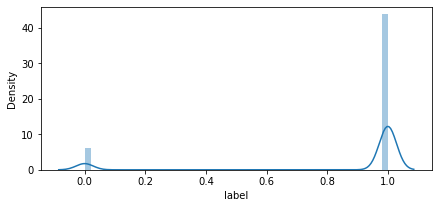

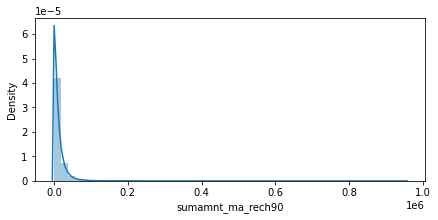

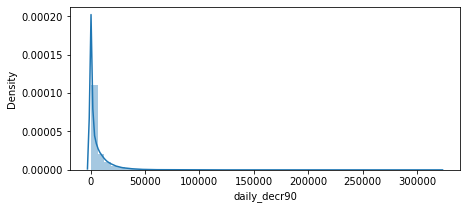

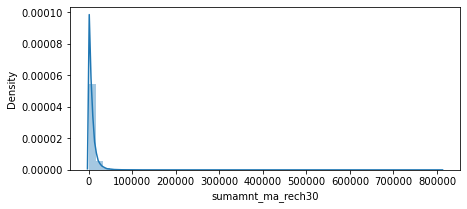

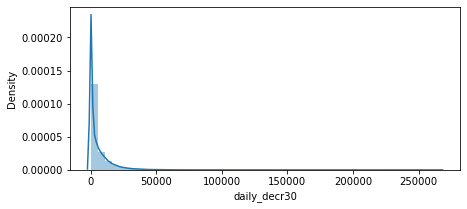

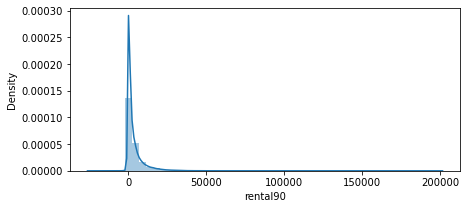

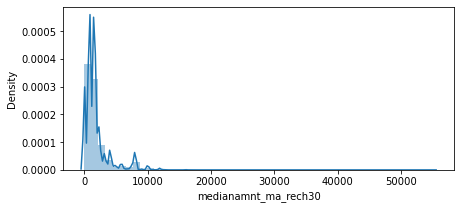

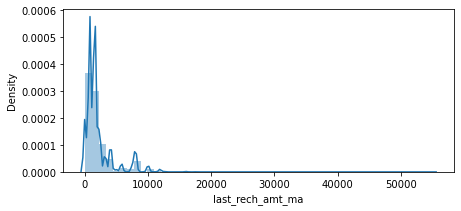

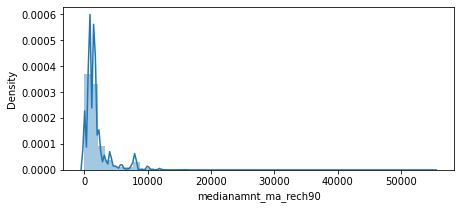

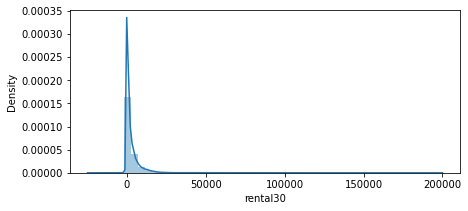

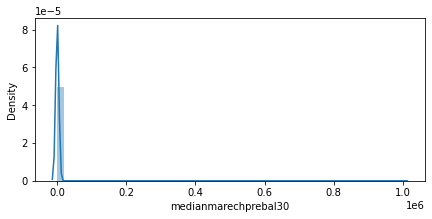

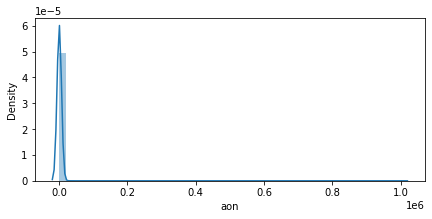

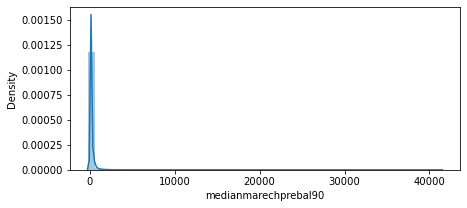

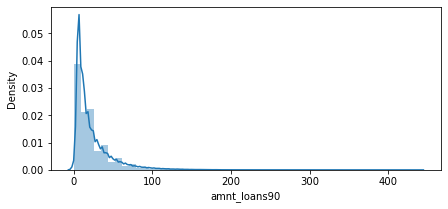

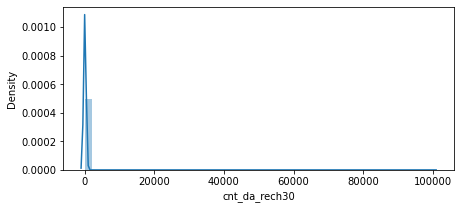

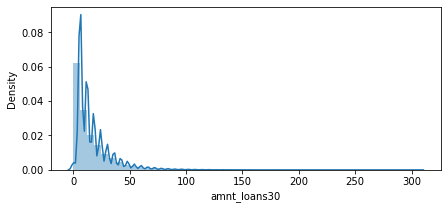

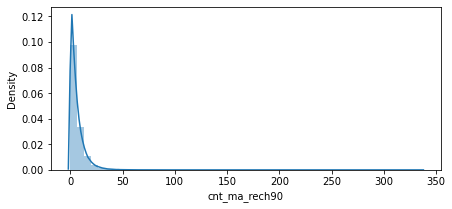

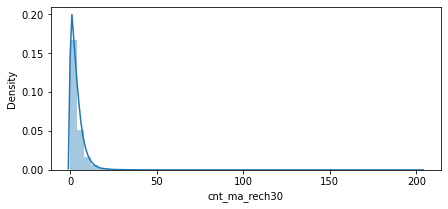

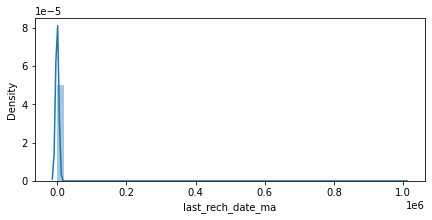

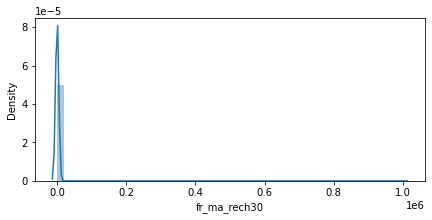

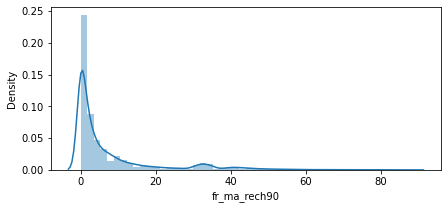

In [16]:
# Distribution of individual varables.
for column in data_cols:
    plt.figure(figsize=(7,3))
    sns.distplot(df[column])

<AxesSubplot:>

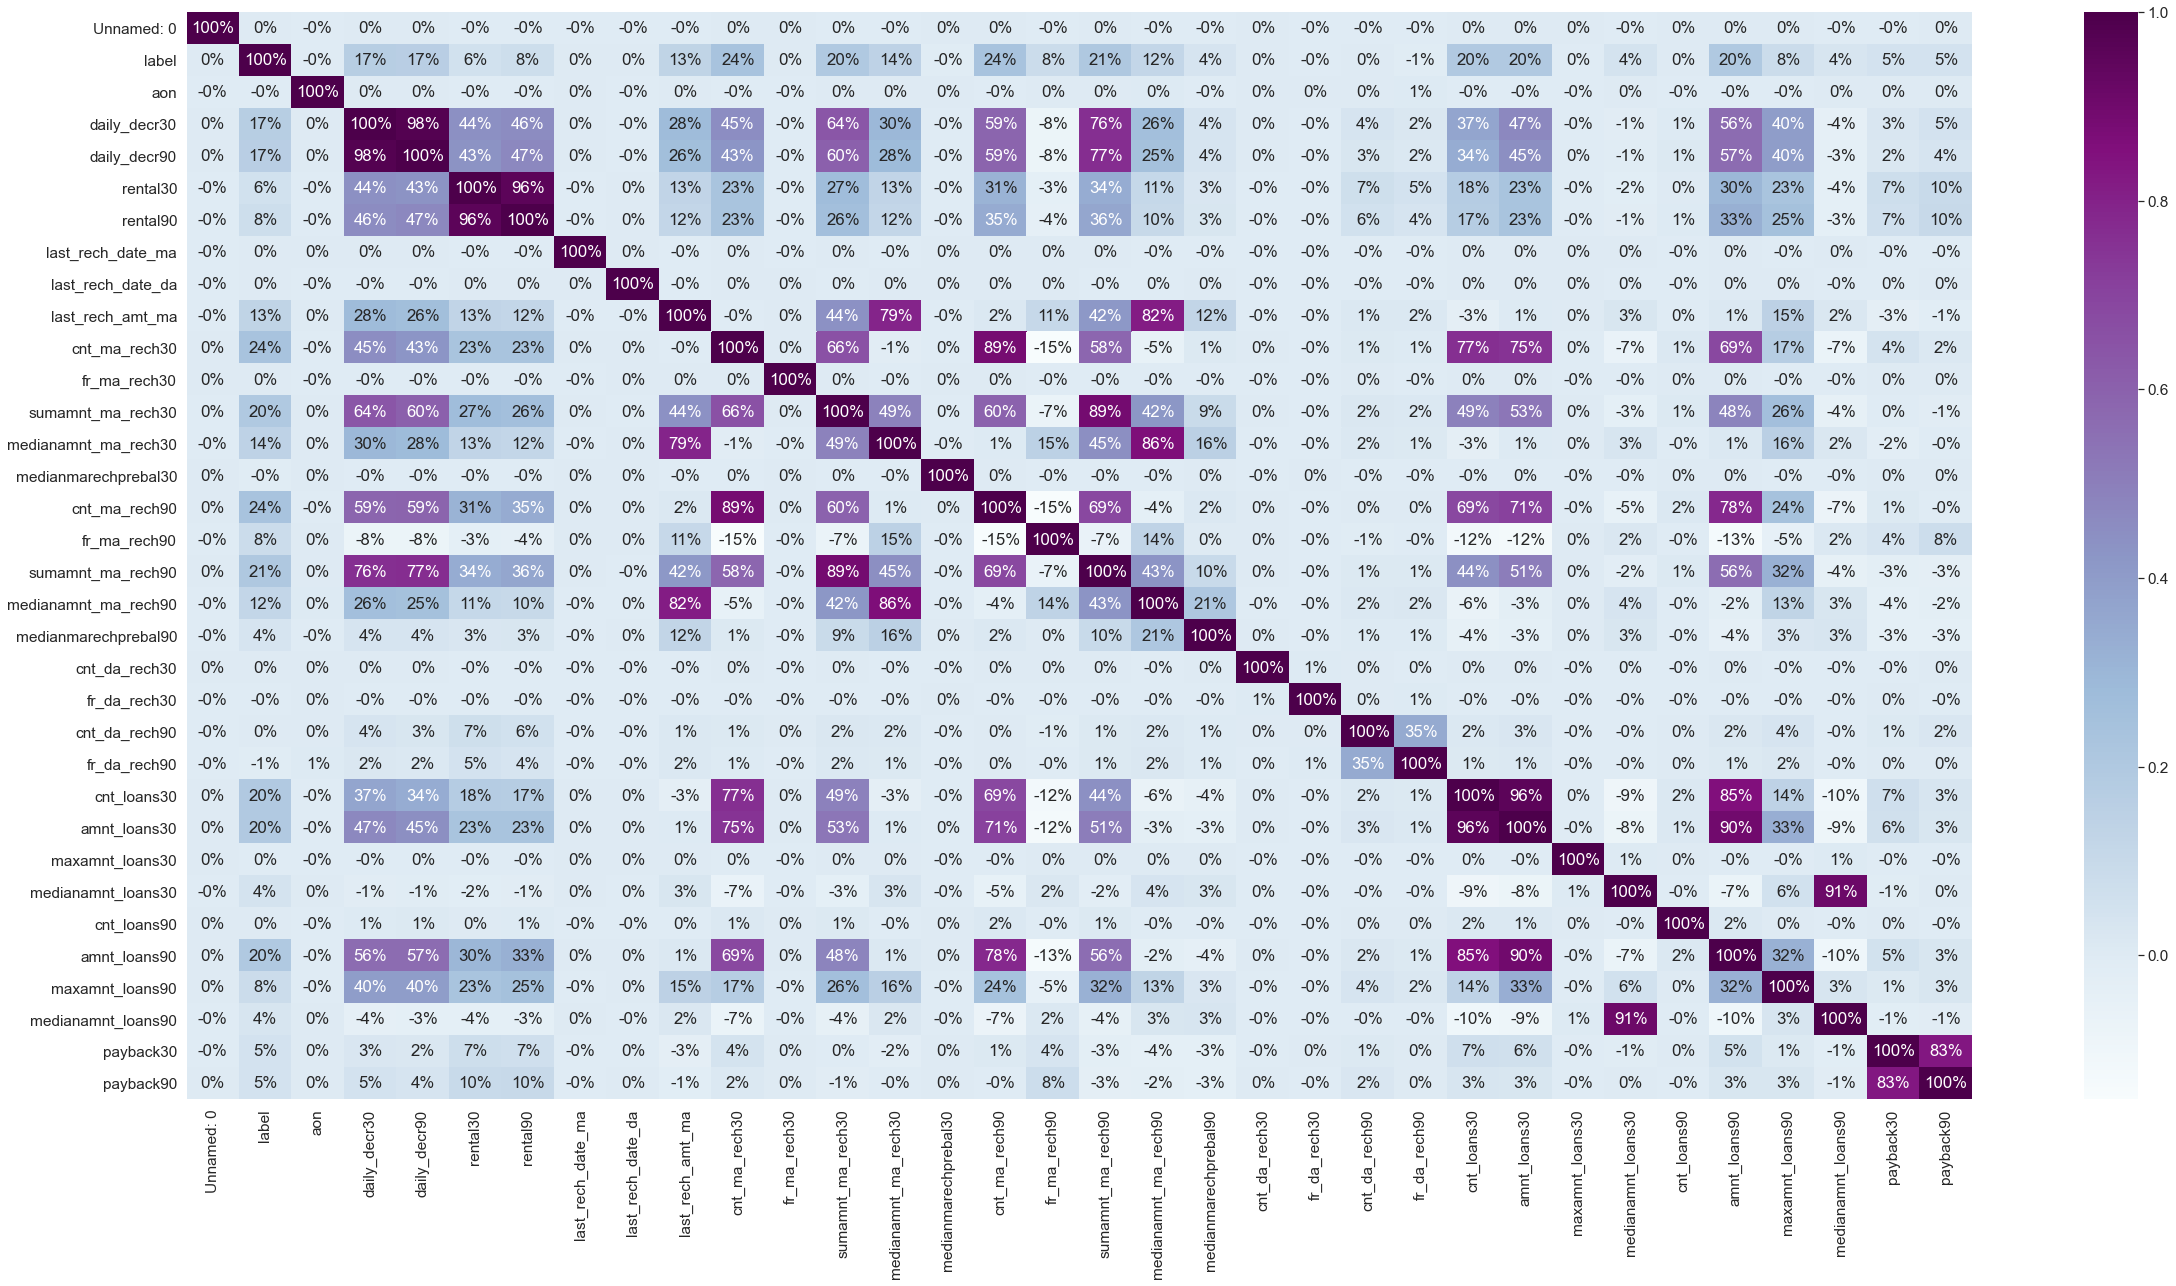

In [17]:
#Heatmap to know correlation between attributes.
correlations = df.corr()
plt.figure(figsize=(40,20))
sns.set(font_scale=1.4)
sns.heatmap(correlations, data=df, annot=True, fmt='.0%',cmap="BuPu")

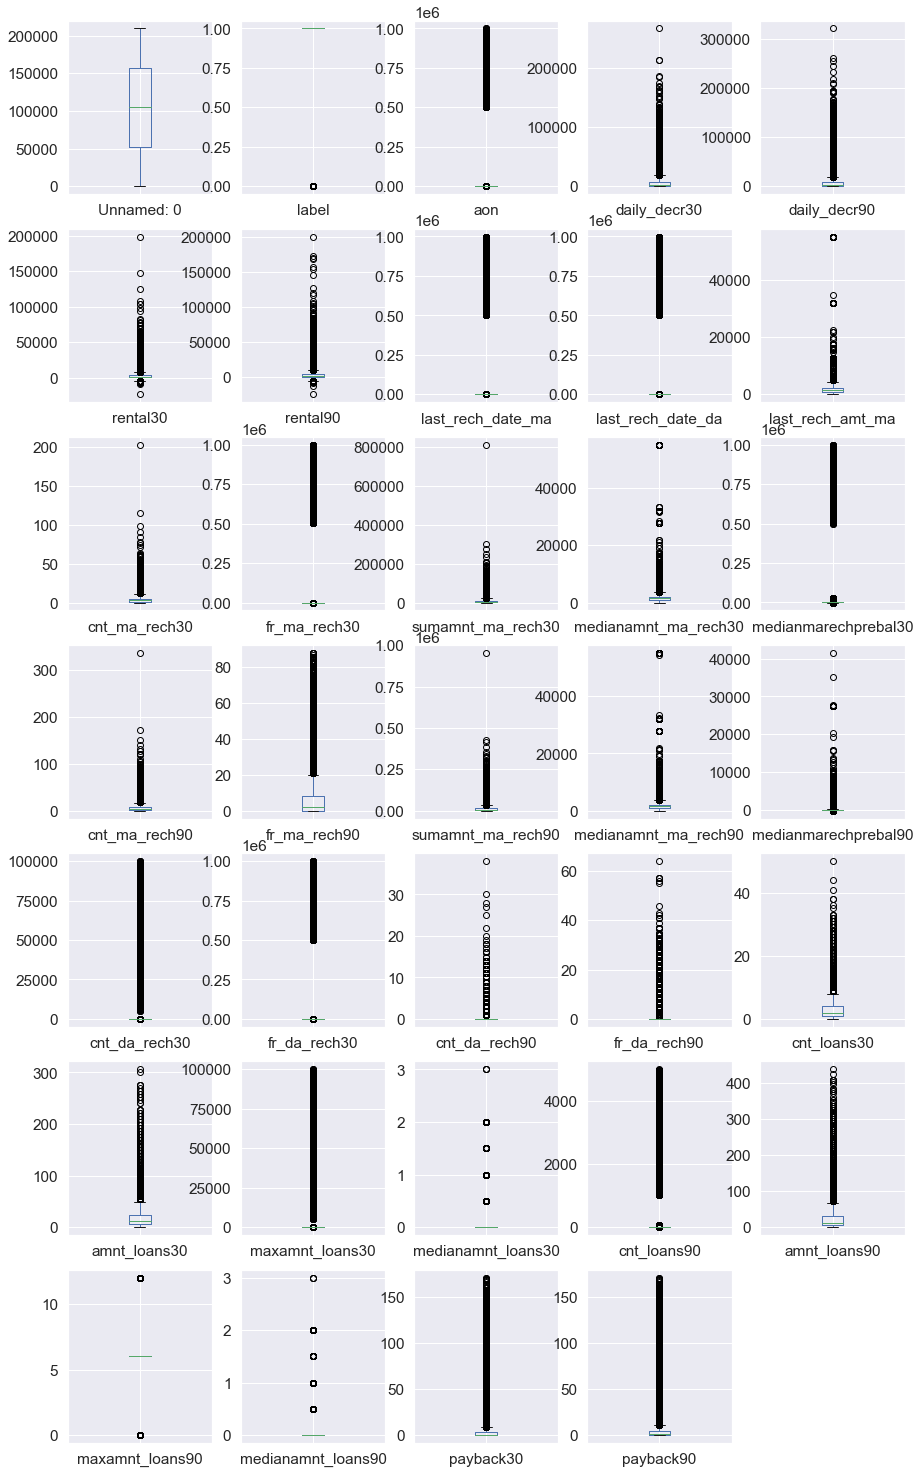

In [18]:
# Checking outliers with boxplot.
df.plot(kind='box', figsize=(15,30), layout =(8,5), sharex=False, subplots=True)
plt.show()

In [19]:
# Checking skewness
df.skew()

Unnamed: 0               0.000000
label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90  

In [20]:
# Dropping unnamed as its irrelevant.
# Dropping msidn as its not helping for predicton.
# Dropping the pcircle as it contains one value in all the rows so it won't help in training data.
# Converting pdate in date format as its in object datatype
df.drop(['Unnamed: 0','msisdn','pcircle','pdate'],axis=1,inplace=True)
#data["pdate"] = pd.to_datetime(data["pdate"])

In [21]:
# Replacing all non-numerals of column 'aon' with mode value.
mode=df['aon'].mode()
df['aon']=df['aon'].fillna(95)
mode

0    95.0
dtype: float64

In [22]:
df['daily_decr30']=df['daily_decr30'].fillna(0.0)
df['daily_decr90']=df['daily_decr90'].fillna(0.0)
df['rental30']=df['rental30'].fillna(0.0)
df['rental90']=df['rental90'].fillna(0.0)

In [23]:
store_colnames=[str(i) for i in df.columns]

NORMALIZATION

In [24]:
Y =df.label
df.drop('label',axis=1,inplace=True)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn import over_sampling
from sklearn import metrics

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve

In [29]:
scalr = Normalizer()

In [30]:
df=scalr.fit_transform(df)

In [31]:
df=pd.DataFrame(df,columns= store_colnames[1:])
df.head(5)

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0.040558,0.455545,0.457051,0.032824,0.038789,0.000298,0.0,0.229483,0.000298,0.003131,0.458967,0.229483,0.001118,0.000298,0.003131,0.458967,0.229483,0.001118,0.0,0.0,0.0,0.0,0.000298,0.001789,0.000895,0.0,0.000298,0.001789,0.000895,0.0,0.004324,0.004324
1,0.032192,0.548083,0.548207,0.166896,0.166896,0.000904,0.0,0.261653,0.000045,0.000000,0.261653,0.261653,0.002760,0.000045,0.000000,0.261653,0.261653,0.002760,0.0,0.0,0.0,0.0,0.000045,0.000543,0.000543,0.0,0.000045,0.000543,0.000543,0.0,0.000000,0.000000
2,0.127283,0.332602,0.332602,0.214152,0.214152,0.000714,0.0,0.366148,0.000238,0.000000,0.366148,0.366148,0.015778,0.000238,0.000000,0.366148,0.366148,0.015778,0.0,0.0,0.0,0.0,0.000238,0.001427,0.001427,0.0,0.000238,0.001427,0.001427,0.0,0.000000,0.000000
3,0.143966,0.012681,0.012681,0.095233,0.095233,0.024492,0.0,0.565709,0.000000,0.000000,0.000000,0.000000,0.000000,0.000597,0.000000,0.565709,0.565709,0.001493,0.0,0.0,0.0,0.0,0.001195,0.007168,0.003584,0.0,0.001195,0.007168,0.003584,0.0,0.000000,0.000000
4,0.030319,0.004822,0.004822,0.035182,0.035182,0.000128,0.0,0.073925,0.000224,0.000064,0.641247,0.073925,0.000928,0.000256,0.000064,0.752247,0.092462,0.001121,0.0,0.0,0.0,0.0,0.000224,0.001345,0.000192,0.0,0.000224,0.001345,0.000192,0.0,0.000075,0.000075


In [32]:
# Define the independent and dependent variable
x=df

MODELLING

TRAIN TEST SPLIT

In [46]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3, random_state = 0)

In [48]:
x_train.shape

(146715, 32)

In [34]:
# logistic regression object 
lr = LogisticRegression(solver='lbfgs', max_iter=400) 
  
# train the model on train set 
lr.fit(x_train, Y_train) 
lr.score(x_train, Y_train)
  
predictions = lr.predict(x_test) 
  
print("Confusion Matrix:",confusion_matrix(Y_test, predictions))
print("Classification Report:",classification_report(Y_test, predictions))
print("Accuracy score:",accuracy_score(Y_test, predictions)) 

Confusion Matrix: [[  938  6964]
 [  721 54255]]
Classification Report:               precision    recall  f1-score   support

           0       0.57      0.12      0.20      7902
           1       0.89      0.99      0.93     54976

    accuracy                           0.88     62878
   macro avg       0.73      0.55      0.57     62878
weighted avg       0.85      0.88      0.84     62878

Accuracy score: 0.8777791914501097


In [35]:
# Cross Validated score for Logistic Regression
scr1= cross_val_score( lr,x,Y, cv=10)
print("Cross Validated score for LR is:",scr1.mean())

Cross Validated score for LR is: 0.8786839286189065


In [39]:
pip install imblearn -U


Note: you may need to restart the kernel to use updated packages.


In [56]:
pip install -U imbalanced-learn --user

Note: you may need to restart the kernel to use updated packages.


In [55]:
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train == 0))) 


Before OverSampling, counts of label '1': 128455
Before OverSampling, counts of label '0': 18260 



In [63]:
print("Confusion Matrix:",confusion_matrix(Y_test, predictions))
print("Classification Report:",classification_report(Y_test, predictions))
print("Accuracy score:",accuracy_score(Y_test, predictions)) 

Confusion Matrix: [[  938  6964]
 [  721 54255]]
Classification Report:               precision    recall  f1-score   support

           0       0.57      0.12      0.20      7902
           1       0.89      0.99      0.93     54976

    accuracy                           0.88     62878
   macro avg       0.73      0.55      0.57     62878
weighted avg       0.85      0.88      0.84     62878

Accuracy score: 0.8777791914501097


In [68]:
import pickle
filename ='micro_credit_loan_defaulter_prediction.pickle'


So here, I can conclude that customers who will pay back loan within 5 days,they fall under some of following observations: Their daily amount spent from main account is continuous and more. Their average main account balance(over last 30 days) is always maintained. Their count and frequency of main account got recharged is continuous and more. Their count of number of loans,amount of loans,maximum amount of loans,Median of amounts of loan is always more than a defaulter person. They always payback their loan with in given limit.